In [1]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
amzn = quandl.get("WIKI/AMZN", start_date="2017-01-01", end_date="2018-01-01")

In [3]:
amzn.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066.0,0.0,1.0,757.92,758.7595,747.7000,753.67,3521066.0
2017-01-04,758.39,759.6800,754.2000,757.18,2510526.0,0.0,1.0,758.39,759.6800,754.2000,757.18,2510526.0
2017-01-05,761.55,782.3999,760.2557,780.45,5830068.0,0.0,1.0,761.55,782.3999,760.2557,780.45,5830068.0
2017-01-06,782.36,799.4400,778.4800,795.99,5986234.0,0.0,1.0,782.36,799.4400,778.4800,795.99,5986234.0
2017-01-09,798.00,801.7742,791.7700,796.92,3446109.0,0.0,1.0,798.00,801.7742,791.7700,796.92,3446109.0


In [4]:
short_window = 30
long_window = 90
signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0
signals['short_mavg'] = amzn['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0) 
signals['positions'] = signals['signal'].diff()

In [5]:
initial_capital= float(50000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['AMZN'] = 50*signals['signal']   
portfolio = positions.multiply(amzn['Adj. Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(amzn['Adj. Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(amzn['Adj. Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

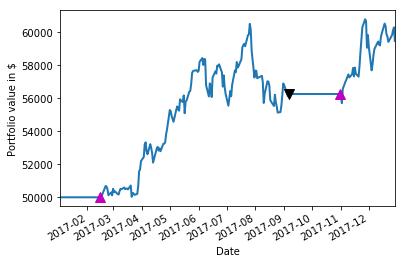

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

In [7]:
returns = portfolio['returns']
np.sqrt(252) * (returns.mean() / returns.std())

1.4756079447373198